In [1]:
import pandas as pd
import os
import sys
#Enables imports from src directory in notebooks
sys.path.insert(0, os.path.abspath('../src'))
#Auto update imports when python files in src is updated
%load_ext autoreload
%autoreload 2


In [2]:
data_location = "E:/Universitetet i Agder/Mikkel Andreas Kvande - kornmo-data-files/raw-data"

dataset_df = pd.read_csv(os.path.join(data_location, '../dataset_raw.csv'))

dataset_df.head()

,orgnr,year,komnr,fulldyrket,overflatedyrket,tilskudd_dyr,levert,areal,bygg,havre,...,havre_sum_1,rug_og_rughvete_sum_1,bygg_sum_2,hvete_sum_2,havre_sum_2,rug_og_rughvete_sum_2,bygg_sum_3,hvete_sum_3,havre_sum_3,rug_og_rughvete_sum_3
0,811555762,2017,1653.0,59,0,0,17067,59,1.0,0.0,...,0.0,0.0,2.0620,0.0,0.0,0.0,2.2445,0.0,0.0,0.0
1,811555762,2017,1653.0,59,0,0,0,0,0.0,1.0,...,0.0,0.0,2.0620,0.0,0.0,0.0,2.2445,0.0,0.0,0.0
2,811555762,2017,1653.0,59,0,0,0,0,0.0,0.0,...,0.0,0.0,2.0620,0.0,0.0,0.0,2.2445,0.0,0.0,0.0
3,811555762,2017,1653.0,59,0,0,0,0,0.0,0.0,...,0.0,0.0,2.0620,0.0,0.0,0.0,2.2445,0.0,0.0,0.0
4,811555762,2018,5028.0,59,0,0,22259,59,1.0,0.0,...,0.0,0.0,2.2445,0.0,0.0,0.0,1.7067,0.0,0.0,0.0


In [3]:
dataset_df = dataset_df.filter(regex=("mean_temp.*"))
dataset_df.head()

,mean_temp0,mean_temp1,mean_temp2,mean_temp3,mean_temp4,mean_temp5,mean_temp6,mean_temp7,mean_temp8,mean_temp9,...,mean_temp173,mean_temp174,mean_temp175,mean_temp176,mean_temp177,mean_temp178,mean_temp179,mean_temp180,mean_temp181,mean_temp182
0,7.9,10.1,8.8,7.8,6.7,6.8,6.4,8.5,11.1,7.1,...,13.6,15.1,12.5,16.9,16.7,17.1,16.4,16.0,15.3,15.3
1,7.9,10.1,8.8,7.8,6.7,6.8,6.4,8.5,11.1,7.1,...,13.6,15.1,12.5,16.9,16.7,17.1,16.4,16.0,15.3,15.3
2,7.9,10.1,8.8,7.8,6.7,6.8,6.4,8.5,11.1,7.1,...,13.6,15.1,12.5,16.9,16.7,17.1,16.4,16.0,15.3,15.3
3,7.9,10.1,8.8,7.8,6.7,6.8,6.4,8.5,11.1,7.1,...,13.6,15.1,12.5,16.9,16.7,17.1,16.4,16.0,15.3,15.3
4,-0.6,-0.5,1.2,3.8,1.9,3.7,3.9,4.3,3.8,6.0,...,4.4,5.3,3.8,6.6,10.2,9.3,6.7,5.7,8.2,7.9


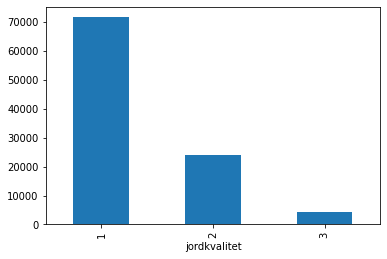

In [4]:
from utils import plot_bar
soilqdf = pd.read_csv(os.path.join(data_location, 'soil-data/soilquality.csv'), nrows=100000)
soilqrdf = pd.read_csv(os.path.join(data_location, 'soil-data/soilquality_refined.csv'))

plot_bar(soilqdf, 'jordkvalitet')


In [5]:
from read_sat_images import read_images
sat_images = read_images('sentinel_100x100_1.h5', 10)


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


['811555762', '811675792', '811935662', '812265962', '812746642', '812863142', '812994492', '812996592', '813128942', '813203782']
['2017', '2018', '2019']


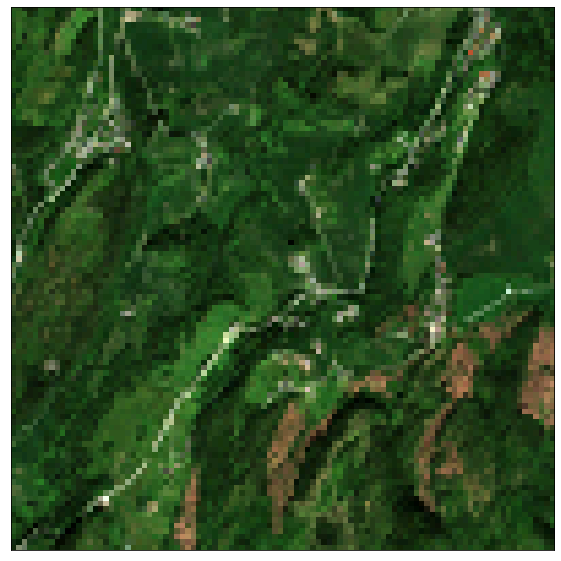

In [6]:
from utils import to_rgb, plot_image, normalize_img
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage


print(list(sat_images.keys()))
org = sat_images['811555762']
print(list(org.keys()))
images = org['2018']
#print(images.shape)
img = images[18]
img = to_rgb(img, normalize=True)
plot_image(img)



#plt.imsave('img.png', img)
# w = h = 15
# fig = plt.figure(figsize=(15, 15))
# columns = 5
# rows = 6
# for i in range(0, columns*rows):
#     img = np.random.randint(10, size=(h,w))
#     fig.add_subplot(rows, columns, i + 1)
#     plt.imshow(to_rgb(images[i]))
# plt.show()


In [7]:
import h5py
import os
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

files0 = []
files1 = []

with h5py.File(os.path.join('E:/MasterThesisData', 'sentinel_100x100_0.h5'), "r") as f:
    images = f['images']
    files0 = list(images)
    images = images['869641642']
    print(images.keys())
with h5py.File(os.path.join('E:/MasterThesisData', 'sentinel_100x100_1.h5'), "r") as f:
    images = f['images']
    files1 = list(images)
    images = images['869641642']
    print(images.keys())


for files in files0:
    for otherfiles in files1:
        if files == otherfiles:
            print(files)

#sentinel_100x100_0.h5 containes earlier images that sentinel_100x100.h5 doesnt contain
                

<KeysViewHDF5 ['2017']>
<KeysViewHDF5 ['2018', '2019']>
811675792
813203782
813524732
816936292
818415222
832732532
869154172
869155012
869181722
869182672
869183032
869185752
869203882
869220612
869292052
869325732
869326232
869432962
869520462
869597252
869605352
869608742
869641642
869641952
869642142
869672122
869674532
869691712
869775452
869999512
870581262
874214922
874688142
875907352
877241572
881477912
881523132
882989372
884140242
884496632
885270182
885620442
887747172
889614552
890289762
891215622
892138192
894461772
895494232
895626422
911625369
911629844
911721783
911734311
912055086
912092208
912163679
912292770
912418359
912486133
912675408
912841707
912858332
912862852
912897907
912976505
912991849
912997111
913017854
913034988
913037812
913155610
913166671
913171128
913207750
913270568
913624017
913770935
913857933
913973038
914606284
914740797
914761670
914799767
914819016
914841933
914850266
914879191
914921546
914927285
914928982
915072321
915089224
915325173
9158